In [25]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [26]:
USE_CUDA=torch.cuda.is_available()
device=torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습함", device)

다음 기기로 학습함 cpu


In [27]:
random.seed(777)
torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [28]:
training_epochs=15
batch_size=100

In [29]:
mnist_train=dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(),
                        download=True)

In [30]:
data_loader=DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True, drop_last=True)

dataset=mnist_train -> 훈련데이터
batch_size=batch_size -> 배치의 크기
shuffle=True -> 매 에포크마다 미니배치를 셔플할 것인가?
drop_last=True -> 마지막 배치를 버릴것인가?

- 데이터 수 : 1000개
- 배치 크기 : 128
- 1000/128=7개의 iterator, 나머지 104일때,
    - 배치크기 128을 충족하지 못하는 배치를 drop_last=True일 때 버림
    - iterator마다 가중치(W),편향(b) 업데이트

In [38]:
for X, Y in data_loader:
    x=X.view(-1, 28*28).to(device)
    print(x)
    # y=Y.to(device)
    # print(y)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ...

In [39]:
# MNIST data size(28 * 28=784)
linear=nn.Linear(784, 10, bias=True).to(device)

In [40]:
crit=nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(linear.parameters(), lr=0.1)

In [41]:
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=len(data_loader)

    for X, Y in data_loader:
        # 배치크기가 100, X(100, 784)
        X=X.view(-1, 28*28).to(device)
        Y=Y.to(device)

        optimizer.zero_grad()
        y_hat=linear(X)

        cost=crit(y_hat, Y)

        cost.backward()
        optimizer.step()

        avg_cost+=cost/total_batch

    print('Epoch: %d, cost=%.9f'%(epoch, avg_cost))
print("End")    

Epoch: 0, cost=0.534598112
Epoch: 1, cost=0.358860046
Epoch: 2, cost=0.330959082
Epoch: 3, cost=0.316403270
Epoch: 4, cost=0.306847095
Epoch: 5, cost=0.300140291
Epoch: 6, cost=0.294955790
Epoch: 7, cost=0.290707469
Epoch: 8, cost=0.287199199
Epoch: 9, cost=0.284492195
Epoch: 10, cost=0.281973392
Epoch: 11, cost=0.279406786
Epoch: 12, cost=0.277644485
Epoch: 13, cost=0.276037902
Epoch: 14, cost=0.274383694
End


In [42]:
X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
Y_test = mnist_test.test_labels.to(device)

prediction = linear(X_test)
correct_prediction = torch.argmax(prediction, 1)== Y_test
accuracy = correct_prediction.float().mean()
print('Accuracy:', accuracy.item())

Accuracy: 0.8881999850273132


c:\Users\admin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\Users\admin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


4420
Lable : tensor([5])
prediction: 5


c:\Users\admin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\Users\admin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


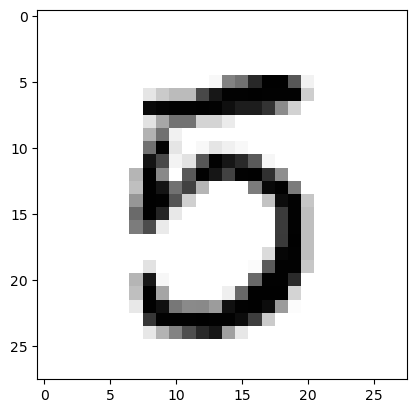

In [48]:
r=random.randint(0, len(mnist_test)-1)
print(r)
X_single_data=mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
Y_single_data=mnist_test.test_labels[r:r+1].to(device)

print("Lable :", Y_single_data)
single_prediction=linear(X_single_data)
print("prediction:", torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
plt.show()